#This character level decoder only transformer language model is based on "Attention is all you need" research paper. The model is pretrained on all the plays of William Shakespeare.

#Data Preparation and Bigram Model

##Date preparation

In [1]:
with open("/content/Shakespeare_plays.txt", "r", encoding="UTF-8") as f:
  text = f.read()
print(len(text))

5221057


In [2]:
print(text[:1000])


ALLS WELL THAT ENDS WELL

by William Shakespeare


Dramatis Personae

  KING OF FRANCE
  THE DUKE OF FLORENCE
  BERTRAM, Count of Rousillon
  LAFEU, an old lord
  PAROLLES, a follower of Bertram
  TWO FRENCH LORDS, serving with Bertram

  STEWARD, Servant to the Countess of Rousillon
  LAVACHE, a clown and Servant to the Countess of Rousillon
  A PAGE, Servant to the Countess of Rousillon

  COUNTESS OF ROUSILLON, mother to Bertram
  HELENA, a gentlewoman protected by the Countess
  A WIDOW OF FLORENCE.
  DIANA, daughter to the Widow


  VIOLENTA, neighbour and friend to the Widow
  MARIANA, neighbour and friend to the Widow

  Lords, Officers, Soldiers, etc., French and Florentine  



 




SCENE:
Rousillon; Paris; Florence; Marseilles


ACT I. SCENE 1.
Rousillon. The COUNT'S palace

Enter BERTRAM, the COUNTESS OF ROUSILLON, HELENA, and LAFEU, all in black

  COUNTESS. In delivering my son from me, I bury a second husband.
  BERTRAM. And I in going, madam, weep o'er my father's deat

In [3]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"&'(),-.0123456789:;<?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_`abcdefghijklmnopqrstuvwxyz|}
83


## Simple (non-contextual) character to integer encoding

In [4]:
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

print(encode("hii there"))
print(decode(encode("hii there")))

[62, 63, 63, 1, 74, 62, 59, 72, 59]
hii there


In [5]:
# # chars = sorted(set("hii there"))
# vocab_size = len(chars)

# stoi = {ch: i / vocab_size for i, ch in enumerate(chars)}
# itos = {round(i * vocab_size): ch for ch, i in stoi.items()}

# encode = lambda s: [stoi[c] for c in s]
# decode = lambda l: ''.join([itos[round(i * vocab_size)] for i in l])

# encoded = encode("hii there")
# decoded = decode(encoded)

# print("Encoded:", encoded)
# print("Decoded:", decoded)


In [6]:
encode(text)

[0,
 25,
 36,
 36,
 43,
 1,
 47,
 29,
 36,
 36,
 1,
 44,
 32,
 25,
 44,
 1,
 29,
 38,
 28,
 43,
 1,
 47,
 29,
 36,
 36,
 0,
 0,
 56,
 79,
 1,
 47,
 63,
 66,
 66,
 63,
 55,
 67,
 1,
 43,
 62,
 55,
 65,
 59,
 73,
 70,
 59,
 55,
 72,
 59,
 0,
 0,
 0,
 28,
 72,
 55,
 67,
 55,
 74,
 63,
 73,
 1,
 40,
 59,
 72,
 73,
 69,
 68,
 55,
 59,
 0,
 0,
 1,
 1,
 35,
 33,
 38,
 31,
 1,
 39,
 30,
 1,
 30,
 42,
 25,
 38,
 27,
 29,
 0,
 1,
 1,
 44,
 32,
 29,
 1,
 28,
 45,
 35,
 29,
 1,
 39,
 30,
 1,
 30,
 36,
 39,
 42,
 29,
 38,
 27,
 29,
 0,
 1,
 1,
 26,
 29,
 42,
 44,
 42,
 25,
 37,
 8,
 1,
 27,
 69,
 75,
 68,
 74,
 1,
 69,
 60,
 1,
 42,
 69,
 75,
 73,
 63,
 66,
 66,
 69,
 68,
 0,
 1,
 1,
 36,
 25,
 30,
 29,
 45,
 8,
 1,
 55,
 68,
 1,
 69,
 66,
 58,
 1,
 66,
 69,
 72,
 58,
 0,
 1,
 1,
 40,
 25,
 42,
 39,
 36,
 36,
 29,
 43,
 8,
 1,
 55,
 1,
 60,
 69,
 66,
 66,
 69,
 77,
 59,
 72,
 1,
 69,
 60,
 1,
 26,
 59,
 72,
 74,
 72,
 55,
 67,
 0,
 1,
 1,
 44,
 47,
 39,
 1,
 30,
 42,
 29,
 38,
 27,
 32,
 1,
 36,
 3

In [7]:
import torch
data = torch.tensor(encode(text), dtype=torch.float)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([5221057]) torch.float32
tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.,  1., 44., 32., 25.,
        44.,  1., 29., 38., 28., 43.,  1., 47., 29., 36., 36.,  0.,  0., 56.,
        79.,  1., 47., 63., 66., 66., 63., 55., 67.,  1., 43., 62., 55., 65.,
        59., 73., 70., 59., 55., 72., 59.,  0.,  0.,  0., 28., 72., 55., 67.,
        55., 74., 63., 73.,  1., 40., 59., 72., 73., 69., 68., 55., 59.,  0.,
         0.,  1.,  1., 35., 33., 38., 31.,  1., 39., 30.,  1., 30., 42., 25.,
        38., 27., 29.,  0.,  1.,  1., 44., 32., 29.,  1., 28., 45., 35., 29.,
         1., 39., 30.,  1., 30., 36., 39., 42., 29., 38., 27., 29.,  0.,  1.,
         1., 26., 29., 42., 44., 42., 25., 37.,  8.,  1., 27., 69., 75., 68.,
        74.,  1., 69., 60.,  1., 42., 69., 75., 73., 63., 66., 66., 69., 68.,
         0.,  1.,  1., 36., 25., 30., 29., 45.,  8.,  1., 55., 68.,  1., 69.,
        66., 58.,  1., 66., 69., 72., 58.,  0.,  1.,  1., 40., 25., 42., 39.,
        36., 36., 29., 43., 

## Train-val data split

In [22]:
data.type(torch.long)

tensor([ 0, 25, 36,  ...,  0,  0,  0])

In [23]:
n = int(0.9*len(data))
train_data = data[:n]
print(train_data)
val_data = data[n:]
print(val_data)
len(train_data), len(val_data)

tensor([ 0., 25., 36.,  ..., 74., 62., 59.])
tensor([ 1., 61., 55.,  ...,  0.,  0.,  0.])


(4698951, 522106)

In [24]:
block_size = 128
train_data[:block_size+1]

tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.,  1., 44., 32., 25.,
        44.,  1., 29., 38., 28., 43.,  1., 47., 29., 36., 36.,  0.,  0., 56.,
        79.,  1., 47., 63., 66., 66., 63., 55., 67.,  1., 43., 62., 55., 65.,
        59., 73., 70., 59., 55., 72., 59.,  0.,  0.,  0., 28., 72., 55., 67.,
        55., 74., 63., 73.,  1., 40., 59., 72., 73., 69., 68., 55., 59.,  0.,
         0.,  1.,  1., 35., 33., 38., 31.,  1., 39., 30.,  1., 30., 42., 25.,
        38., 27., 29.,  0.,  1.,  1., 44., 32., 29.,  1., 28., 45., 35., 29.,
         1., 39., 30.,  1., 30., 36., 39., 42., 29., 38., 27., 29.,  0.,  1.,
         1., 26., 29., 42., 44., 42., 25., 37.,  8.,  1., 27., 69., 75., 68.,
        74.,  1., 69.])

## Formulating basic understanding of model

In [25]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([0.]) the target: 25.0
when input is tensor([ 0., 25.]) the target: 36.0
when input is tensor([ 0., 25., 36.]) the target: 36.0
when input is tensor([ 0., 25., 36., 36.]) the target: 43.0
when input is tensor([ 0., 25., 36., 36., 43.]) the target: 1.0
when input is tensor([ 0., 25., 36., 36., 43.,  1.]) the target: 47.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47.]) the target: 29.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29.]) the target: 36.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36.]) the target: 36.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.]) the target: 1.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.,  1.]) the target: 44.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.,  1., 44.]) the target: 32.0
when input is tensor([ 0., 25., 36., 36., 43.,  1., 47., 29., 36., 36.,  1., 44., 32.]) the target: 25.0
when input is tensor([ 0., 2

## Gaining Transformer understanding

In [33]:
torch.manual_seed(1337)
batch_size = 4 # independent sequences to process in parallel
# This is give a matrix size of 4 by block size

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x.type(torch.long), y.type(torch.long)

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 128])
tensor([[66, 66,  1, 68, 69, 74,  1, 57, 69, 67, 59,  8,  0,  1,  1,  1,  1, 44,
         62, 59, 63, 72,  1, 67, 63, 68, 58, 73,  1, 67, 55, 79,  1, 57, 62, 55,
         68, 61, 59, 10,  1, 26, 59, 73, 63, 58, 59, 73,  8,  1, 63, 74,  1, 77,
         59, 72, 59,  1, 55,  1, 67, 69, 57, 65,  0,  1,  1,  1,  1, 25, 70, 74,
          1, 74, 69,  1, 56, 59,  1, 72, 59, 68, 58, 59, 72,  5, 58,  8,  1, 60,
         69, 72,  1, 73, 69, 67, 59, 69, 68, 59,  1, 74, 69,  1, 73, 55, 79,  0,
          1,  1,  1,  1,  3, 26, 72, 59, 55, 65,  1, 75, 70,  1, 74, 62, 59,  1,
         43, 59],
        [74, 69,  1, 43, 69, 67, 59, 72, 73, 59, 74,  1, 74, 62, 55, 68,  1, 49,
         69, 72, 65, 21,  0,  1,  1,  1,  1, 26, 69, 74, 62,  1, 55, 72, 59,  1,
         67, 79,  1, 65, 63, 68, 73, 67, 59, 68,  8,  1, 55, 68, 58,  1, 33,  1,
         66, 69, 76, 59,  1, 74, 62, 59, 67,  1, 56, 69, 74, 62, 10,  0,  1,  1,
          1,  1, 25, 73,  1, 77, 59, 66, 66,  1, 74, 62, 59, 7

In [34]:
xb

tensor([[66, 66,  1, 68, 69, 74,  1, 57, 69, 67, 59,  8,  0,  1,  1,  1,  1, 44,
         62, 59, 63, 72,  1, 67, 63, 68, 58, 73,  1, 67, 55, 79,  1, 57, 62, 55,
         68, 61, 59, 10,  1, 26, 59, 73, 63, 58, 59, 73,  8,  1, 63, 74,  1, 77,
         59, 72, 59,  1, 55,  1, 67, 69, 57, 65,  0,  1,  1,  1,  1, 25, 70, 74,
          1, 74, 69,  1, 56, 59,  1, 72, 59, 68, 58, 59, 72,  5, 58,  8,  1, 60,
         69, 72,  1, 73, 69, 67, 59, 69, 68, 59,  1, 74, 69,  1, 73, 55, 79,  0,
          1,  1,  1,  1,  3, 26, 72, 59, 55, 65,  1, 75, 70,  1, 74, 62, 59,  1,
         43, 59],
        [74, 69,  1, 43, 69, 67, 59, 72, 73, 59, 74,  1, 74, 62, 55, 68,  1, 49,
         69, 72, 65, 21,  0,  1,  1,  1,  1, 26, 69, 74, 62,  1, 55, 72, 59,  1,
         67, 79,  1, 65, 63, 68, 73, 67, 59, 68,  8,  1, 55, 68, 58,  1, 33,  1,
         66, 69, 76, 59,  1, 74, 62, 59, 67,  1, 56, 69, 74, 62, 10,  0,  1,  1,
          1,  1, 25, 73,  1, 77, 59, 66, 66,  1, 74, 62, 59, 79,  1, 67, 55, 79,
          

## Applying Bigram Model

In [35]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        logits = self.token_embedding_table(idx)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([512, 83])
tensor(4.9483, grad_fn=<NllLossBackward0>)

44;5xK)NA(!)2V.'(7a_ BfsZ`"eQ!Com`0lTFyfA5';PV|M
Fvj?ccq"RnFbe4tE,G9l:Tb}ebCI4R11Aq!6Tgkigdor;cx'(JO


### Optimizing Bigram model

In [36]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [37]:
batch_size = 32
for steps in range(5000):

    xb, yb = get_batch('train')

    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


2.5152995586395264


In [31]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))

Streaming output truncated to the last 5000 lines.
          7, 24, 51, 66, 35, 60, 46,  1,  5, 61, 37, 38, 76, 51, 21, 36, 14,  2,
         22, 13, 43, 46, 42, 36, 65, 81, 31, 51, 66, 63,  8, 20, 40, 47, 51, 47,
         26, 56, 30, 46, 74, 52, 12, 76, 48, 43, 36, 74, 69, 32, 33, 63, 69, 68,
         23, 63, 34, 64, 73, 65, 32, 30, 47, 47, 30, 42, 74,  0, 31, 56, 58, 55,
         71, 51, 54, 26, 73, 41, 31, 27, 69, 59, 81, 39, 58, 66, 44, 10, 48, 42,
          5, 68, 61]])
tensor([[ 0, 80, 52, 63, 57, 17, 30, 79, 60, 25, 16,  5, 22, 40, 46, 81, 37,  0,
         30, 76, 64, 24, 57, 57, 71,  3, 42, 68, 30, 56, 59, 15, 74, 29,  8, 31,
         20, 66, 21, 44, 56, 82, 59, 56, 27, 33, 15, 42, 12, 12, 25, 71,  2, 17,
         44, 61, 65, 63, 61, 58, 69, 72, 22, 57, 78,  5,  6, 34, 39, 34, 12, 57,
         74,  4, 81, 57, 21, 25, 15,  8, 43, 75,  9, 75,  9, 14, 79, 50, 22, 40,
         40, 50, 46,  2, 28, 37, 52, 61, 26, 74, 52,  0, 31, 80,  7,  3, 74, 72,
         48, 68,  1, 26, 57, 31, 39

#Transformer

##Pretraining

### Self Attention - Core Mechanism

In [ ]:
from math import sqrt
import numpy as np
embedded_vector = [[0.2,0.4,0.6], [0.3,0.7,0.5], [0.1,0.8,0.9]]
Wq, Wv, Wk = [[0.1, 0.2, 0.3], [0.4, 0.6, 0.6], [0.7, 0.8, 0.9]], [[0.7, 0.2, 0.4], [0.5, 0.2, 0.4], [0.8, 0.4, 0.1]], [[0.7, 0.1, 0.4], [0.5, 0.8, 0.4], [0.6, 0.4, 0.1]]
Q = np.dot(embedded_vector, Wq)
V = np.dot(embedded_vector, Wv)
K = np.dot(embedded_vector, Wk)
print(f"Q \n {Q}")
print(f"V \n {V}")
print(f"K \n {K}")
dot_product = np.dot(Q, K.T)
print("Dot product\n", dot_product)
scaled_dot = dot_product/sqrt(len(embedded_vector))
print("Scaled dot product \n", scaled_dot)
softmax = np.exp(scaled_dot) / np.sum(np.exp(scaled_dot), axis=1, keepdims=True)
print("Softmax \n", softmax)
attention = np.dot(softmax, V)
print("Attention \n", attention)

### Decoder Architecture

In [ ]:

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix]).to(device)
    y = torch.stack([data[i+1:i+block_size+1] for i in ix]).to(device)
    return x, y


class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        k, q, v = self.key(x), self.query(x), self.value(x)
        wei = (q @ k.transpose(-2, -1)) * (1 / math.sqrt(q.size(-1)))
        wei = wei.masked_fill(self.tril[:wei.size(-2), :wei.size(-1)] == 0, float('-inf'))
        wei = self.dropout(F.softmax(wei, dim=-1))
        return wei @ v

class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout(self.proj(torch.cat([head(x) for head in self.heads], dim=-1)))

class FeedFoward(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1, self.ln2 = nn.LayerNorm(n_embd), nn.LayerNorm(n_embd)

    def forward(self, x):
        return x + self.ffwd(self.ln2(x + self.sa(self.ln1(x))))

class LanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    # Complex code (GPT-generated)
    def forward(self, idx, targets=None):
        tok_emb, pos_emb = self.token_embedding_table(idx), self.position_embedding_table(torch.arange(idx.size(1), device=device))
        x = self.ln_f(self.blocks(tok_emb + pos_emb))
        logits = self.lm_head(x)
        loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1)) if targets is not None else None
        return logits, loss

    # Complex code (GPT-generated)
    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, _ = self(idx[:, -block_size:])
            idx = torch.cat((idx, torch.multinomial(F.softmax(logits[:, -1, :], dim=-1), num_samples=1)), dim=1)
        return idx


### Hyperparameter Tuning

###Observing performance for different number of heads

#### 4 heads transformer

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math

# Hyperparameters
batch_size = 16
block_size = 32
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

@torch.no_grad()
def estimate_loss():
    model.eval()
    out = {split: torch.mean(torch.tensor([model(*get_batch(split))[1].item() for _ in range(eval_iters)])) for split in ['train', 'val']}
    model.train()
    return out

losses_list_4heads=[]
model = LanguageModel().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
for iter in range(max_iters):
    if iter % eval_interval == 0:
        losses = estimate_loss()
        losses_list_4heads.append(losses)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    xb, yb = get_batch('train')
    optimizer.zero_grad()
    _, loss = model(xb, yb)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=2000)[0].tolist()))


step 0: train loss 4.6313, val loss 4.6294
step 100: train loss 2.6691, val loss 2.6913
step 200: train loss 2.4188, val loss 2.4389
step 300: train loss 2.3200, val loss 2.3333
step 400: train loss 2.2497, val loss 2.2358
step 500: train loss 2.1850, val loss 2.2000
step 600: train loss 2.1557, val loss 2.1609
step 700: train loss 2.1164, val loss 2.1268
step 800: train loss 2.0845, val loss 2.0964
step 900: train loss 2.0584, val loss 2.0736
step 1000: train loss 2.0273, val loss 2.0387
step 1100: train loss 2.0021, val loss 2.0149
step 1200: train loss 1.9822, val loss 1.9972
step 1300: train loss 1.9676, val loss 1.9786
step 1400: train loss 1.9596, val loss 1.9617
step 1500: train loss 1.9446, val loss 1.9462
step 1600: train loss 1.9284, val loss 1.9420
step 1700: train loss 1.9166, val loss 1.9149
step 1800: train loss 1.8882, val loss 1.9167
step 1900: train loss 1.8925, val loss 1.9049

    Ofut
    Corry on Dy Quadenni. Now harfue for whath go thime but-
  Yory that lime. No.

In [ ]:
losses_list_4heads

[{'train': tensor(4.6313), 'val': tensor(4.6294)},
 {'train': tensor(2.6691), 'val': tensor(2.6913)},
 {'train': tensor(2.4188), 'val': tensor(2.4389)},
 {'train': tensor(2.3200), 'val': tensor(2.3333)},
 {'train': tensor(2.2497), 'val': tensor(2.2358)},
 {'train': tensor(2.1850), 'val': tensor(2.2000)},
 {'train': tensor(2.1557), 'val': tensor(2.1609)},
 {'train': tensor(2.1164), 'val': tensor(2.1268)},
 {'train': tensor(2.0845), 'val': tensor(2.0964)},
 {'train': tensor(2.0584), 'val': tensor(2.0736)},
 {'train': tensor(2.0273), 'val': tensor(2.0387)},
 {'train': tensor(2.0021), 'val': tensor(2.0149)},
 {'train': tensor(1.9822), 'val': tensor(1.9972)},
 {'train': tensor(1.9676), 'val': tensor(1.9786)},
 {'train': tensor(1.9596), 'val': tensor(1.9617)},
 {'train': tensor(1.9446), 'val': tensor(1.9462)},
 {'train': tensor(1.9284), 'val': tensor(1.9420)},
 {'train': tensor(1.9166), 'val': tensor(1.9149)},
 {'train': tensor(1.8882), 'val': tensor(1.9167)},
 {'train': tensor(1.8925), 'val

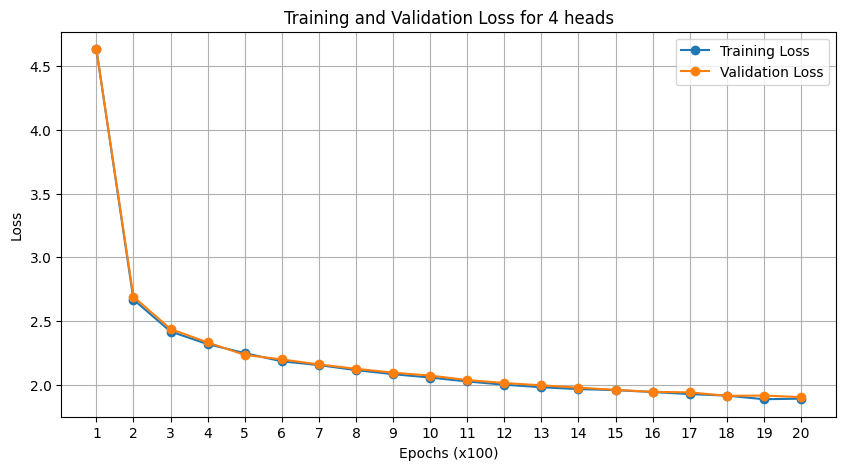

In [ ]:
import matplotlib.pyplot as plt
import torch
loss_data = losses_list_4heads
train_losses = [entry['train'].item() for entry in loss_data]
val_losses = [entry['val'].item() for entry in loss_data]
epochs = range(1, len(loss_data) + 1)
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss for 4 heads')
plt.xlabel('Epochs (x100)')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

#### Increasing number of heads to 8

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math

batch_size = 16
block_size = 32
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 8
n_layer = 4
dropout = 0.0

@torch.no_grad()
def estimate_loss():
    model_8heads.eval()
    out = {split: torch.mean(torch.tensor([model_8heads(*get_batch(split))[1].item() for _ in range(eval_iters)])) for split in ['train', 'val']}
    model_8heads.train()
    return out

losses_list_8heads=[]
model_8heads = LanguageModel().to(device)
optimizer = torch.optim.AdamW(model_8heads.parameters(), lr=learning_rate)
for iter in range(max_iters):
    if iter % eval_interval == 0:
        losses = estimate_loss()
        losses_list_8heads.append(losses)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    xb, yb = get_batch('train')
    optimizer.zero_grad()
    _, loss = model_8heads(xb, yb)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model_8heads.generate(context, max_new_tokens=2000)[0].tolist()))


step 0: train loss 4.5390, val loss 4.5337
step 100: train loss 2.7012, val loss 2.7224
step 200: train loss 2.4502, val loss 2.4569
step 300: train loss 2.3483, val loss 2.3563
step 400: train loss 2.2426, val loss 2.2502
step 500: train loss 2.1883, val loss 2.2032
step 600: train loss 2.1628, val loss 2.1597
step 700: train loss 2.1134, val loss 2.1249
step 800: train loss 2.0894, val loss 2.0969
step 900: train loss 2.0419, val loss 2.0496
step 1000: train loss 2.0102, val loss 2.0236
step 1100: train loss 1.9955, val loss 1.9952
step 1200: train loss 1.9807, val loss 1.9875
step 1300: train loss 1.9517, val loss 1.9690
step 1400: train loss 1.9348, val loss 1.9415
step 1500: train loss 1.9217, val loss 1.9170
step 1600: train loss 1.9056, val loss 1.9147
step 1700: train loss 1.8934, val loss 1.9012
step 1800: train loss 1.8919, val loss 1.8984
step 1900: train loss 1.8651, val loss 1.8749

  Go morce
    beceant citalied shal-beans.
     LORGENTR. Howth's ofth wack akines, sheelf

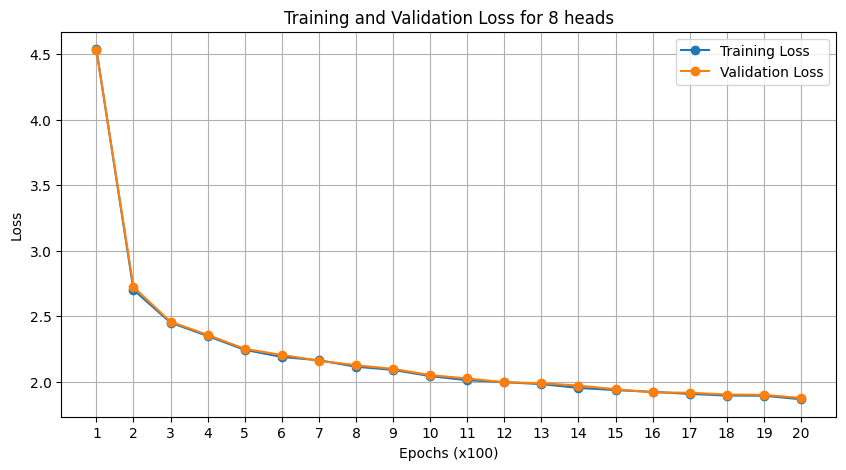

In [ ]:
import matplotlib.pyplot as plt
import torch
loss_data = losses_list_8heads
train_losses = [entry['train'].item() for entry in loss_data]
val_losses = [entry['val'].item() for entry in loss_data]
epochs = range(1, len(loss_data) + 1)  # Assuming one entry per epoch
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

# Adding titles and labels
plt.title('Training and Validation Loss for 8 heads')
plt.xlabel('Epochs (x100)')
plt.ylabel('Loss')
plt.xticks(epochs)  # Set x-ticks to be the epochs
plt.legend()
plt.grid(True)
plt.show()

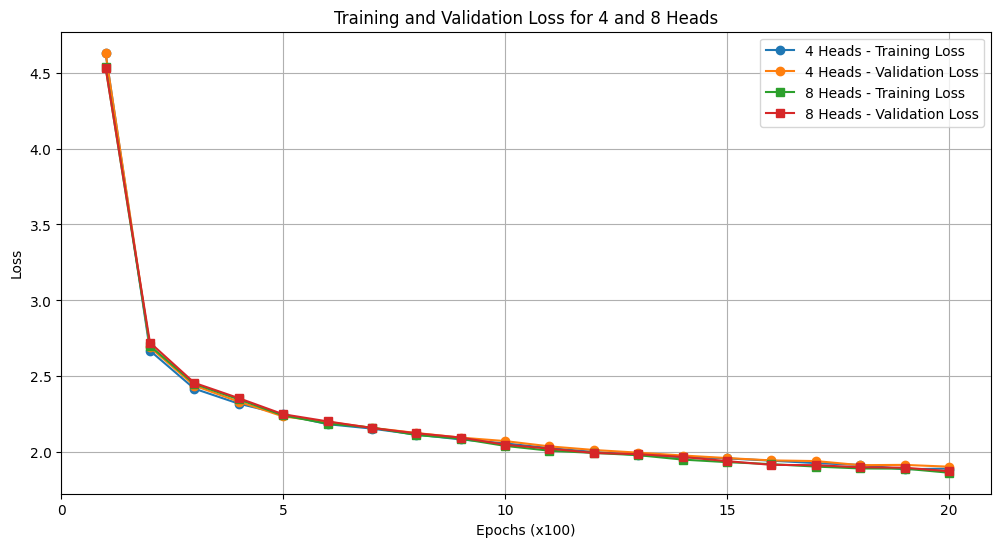

In [ ]:
import matplotlib.pyplot as plt

loss_data_4 = losses_list_4heads
train_losses_4 = [entry['train'].item() for entry in loss_data_4]
val_losses_4 = [entry['val'].item() for entry in loss_data_4]
epochs_4 = range(1, len(loss_data_4) + 1)

loss_data_8 = losses_list_8heads
train_losses_8 = [entry['train'].item() for entry in loss_data_8]
val_losses_8 = [entry['val'].item() for entry in loss_data_8]
epochs_8 = range(1, len(loss_data_8) + 1)

plt.figure(figsize=(12, 6))

plt.plot(epochs_4, train_losses_4, label='4 Heads - Training Loss', marker='o')
plt.plot(epochs_4, val_losses_4, label='4 Heads - Validation Loss', marker='o')

plt.plot(epochs_8, train_losses_8, label='8 Heads - Training Loss', marker='s')
plt.plot(epochs_8, val_losses_8, label='8 Heads - Validation Loss', marker='s')

# Adding titles and labels
plt.title('Training and Validation Loss for 4 and 8 Heads')
plt.xlabel('Epochs (x100)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Ensure x-ticks align with both epoch ranges
plt.xticks(range(0, max(len(loss_data_4), len(loss_data_8)) + 1, 5))  # Adjust step size as needed

# Show the combined plot
plt.show()


### Conclusion - Increasing number of heads from 4 to 8 has no effect on the accuracy of the model

### Observing loss at different block sizes (context window)

####Varying block sizes above 32

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
import math
# Hyperparameters
batch_size = 16
block_sizes = [32, 64, 128, 256, 512]
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split, block_size):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i + block_size] for i in ix]).to(device)
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix]).to(device)
    return x, y

@torch.no_grad()
def estimate_loss(model, block_size):
    model.eval()
    out = {}
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split, block_size)
            _, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

results = {}

for block_size in block_sizes:
    print(f"Training for block size {block_size}")
    model = LanguageModel().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    train_losses, val_losses = [], []
    for iter in range(max_iters):
        if iter % eval_interval == 0:
            losses = estimate_loss(model, block_size)
            train_losses.append(losses['train'].item())
            val_losses.append(losses['val'].item())
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        xb, yb = get_batch('train', block_size)
        optimizer.zero_grad()
        _, loss = model(xb, yb)
        loss.backward()
        optimizer.step()

    results[block_size] = (train_losses, val_losses)

# Plot results
plt.figure(figsize=(12, 6))
for block_size in block_sizes:
    train_losses, val_losses = results[block_size]
    plt.plot(range(0, max_iters, eval_interval), val_losses, label=f"Block Size {block_size}")

plt.title("Validation Loss for Different Block Sizes")
plt.xlabel("Training Steps")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show()


Training for block size 32
step 0: train loss 4.5735, val loss 4.5678
step 100: train loss 2.6567, val loss 2.6815
step 200: train loss 2.4222, val loss 2.4314
step 300: train loss 2.3164, val loss 2.3265
step 400: train loss 2.2584, val loss 2.2458
step 500: train loss 2.1968, val loss 2.1990
step 600: train loss 2.1576, val loss 2.1634
step 700: train loss 2.1380, val loss 2.1234
step 800: train loss 2.0859, val loss 2.0866
step 900: train loss 2.0548, val loss 2.0707
step 1000: train loss 2.0215, val loss 2.0171
step 1100: train loss 2.0006, val loss 2.0053
step 1200: train loss 1.9788, val loss 1.9944
step 1300: train loss 1.9520, val loss 1.9787
step 1400: train loss 1.9317, val loss 1.9452
step 1500: train loss 1.9333, val loss 1.9438
step 1600: train loss 1.9004, val loss 1.9128
step 1700: train loss 1.9056, val loss 1.9026
step 1800: train loss 1.8681, val loss 1.8746
step 1900: train loss 1.8768, val loss 1.8804
Training for block size 64
step 0: train loss 4.5356, val loss 4.

**Conclusion - Smaller block size provides better results. Minimal difference observed between block sizes 64 and 32**

####Varying block sizes below 32

Training for block size 2
step 0: train loss 4.6626, val loss 4.6490
step 100: train loss 2.8966, val loss 2.9279
step 200: train loss 2.6988, val loss 2.6939
step 300: train loss 2.5987, val loss 2.5699
step 400: train loss 2.5279, val loss 2.5269
step 500: train loss 2.4907, val loss 2.4803
step 600: train loss 2.4853, val loss 2.4742
step 700: train loss 2.4411, val loss 2.5145
step 800: train loss 2.4410, val loss 2.4313
step 900: train loss 2.4321, val loss 2.4404
step 1000: train loss 2.4425, val loss 2.4103
step 1100: train loss 2.3984, val loss 2.4303
step 1200: train loss 2.3951, val loss 2.4015
step 1300: train loss 2.4649, val loss 2.4310
step 1400: train loss 2.3801, val loss 2.4050
step 1500: train loss 2.4046, val loss 2.3991
step 1600: train loss 2.3768, val loss 2.3795
step 1700: train loss 2.3885, val loss 2.3878
step 1800: train loss 2.3702, val loss 2.3768
step 1900: train loss 2.3853, val loss 2.4109
Training for block size 4
step 0: train loss 4.5077, val loss 4.50

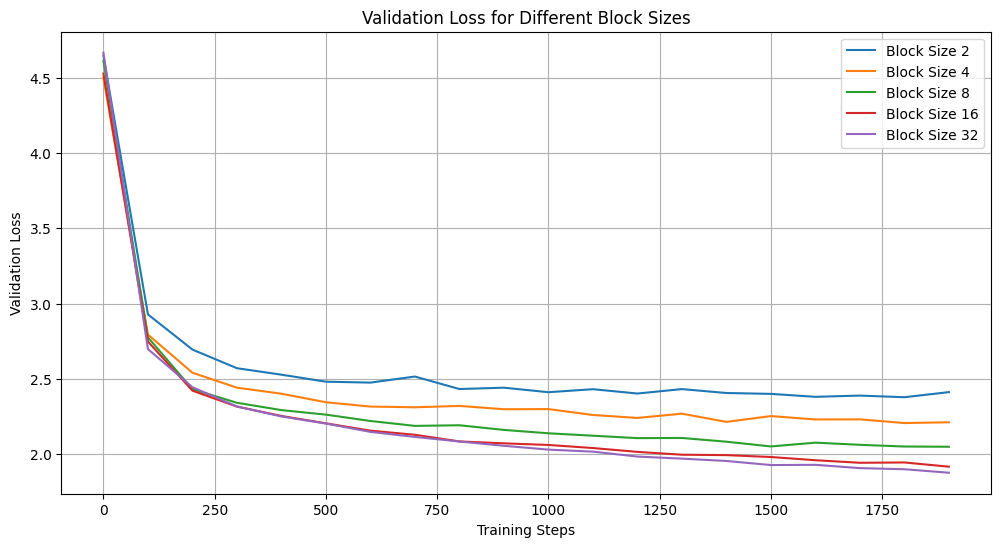

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 16
block_sizes = [2, 4, 8, 16, 32]
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

torch.manual_seed(1337)

data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

def get_batch(split, block_size):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i + block_size] for i in ix]).to(device)
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix]).to(device)
    return x, y

@torch.no_grad()
def estimate_loss(model, block_size):
    model.eval()
    out = {}
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split, block_size)
            _, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

results = {}

for block_size in block_sizes:
    print(f"Training for block size {block_size}")
    model = LanguageModel().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    train_losses, val_losses = [], []
    for iter in range(max_iters):
        if iter % eval_interval == 0:
            losses = estimate_loss(model, block_size)
            train_losses.append(losses['train'].item())
            val_losses.append(losses['val'].item())
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        xb, yb = get_batch('train', block_size)
        optimizer.zero_grad()
        _, loss = model(xb, yb)
        loss.backward()
        optimizer.step()

    results[block_size] = (train_losses, val_losses)

# Plot results
plt.figure(figsize=(12, 6))
for block_size in block_sizes:
    train_losses, val_losses = results[block_size]
    plt.plot(range(0, max_iters, eval_interval), val_losses, label=f"Block Size {block_size}")

plt.title("Validation Loss for Different Block Sizes")
plt.xlabel("Training Steps")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show()


###Conclusion - The difference between block sizes 32 and 64 is less than 0.01

###From all the experiments, the optimal architecture must have parameters as 32 block size and 4 heads. Final Model:

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math
batch_size = 16
block_size = 32
max_iters = 12000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i + block_size] for i in ix]).to(device)
    y = torch.stack([data[i + 1:i + block_size + 1] for i in ix]).to(device)
    return x, y


@torch.no_grad()
def estimate_loss_and_perplexity():
    model.eval()
    out = {}
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            _, loss = model(X, Y)
            losses[k] = loss.item()
        avg_loss = losses.mean()
        perplexity = torch.exp(avg_loss)  # Calculate perplexity
        out[split] = {'loss': avg_loss.item(), 'perplexity': perplexity.item()}
    model.train()
    return out


final_model_losses_list = []
model = LanguageModel().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    if iter % eval_interval == 0:
        metrics = estimate_loss_and_perplexity()
        final_model_losses_list.append(metrics)
        print(f"step {iter}: train loss {metrics['train']['loss']:.4f}, train perplexity {metrics['train']['perplexity']:.4f}, "
              f"val loss {metrics['val']['loss']:.4f}, val perplexity {metrics['val']['perplexity']:.4f}")

    xb, yb = get_batch('train')
    optimizer.zero_grad()
    _, loss = model(xb, yb)
    loss.backward()
    optimizer.step()

context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=2000)[0].tolist()))
print("Final Loss and Perplexity: \n", final_model_losses_list[-1])

step 0: train loss 4.6313, train perplexity 102.6436, val loss 4.6294, val perplexity 102.4553
step 100: train loss 2.6691, train perplexity 14.4273, val loss 2.6913, val perplexity 14.7512
step 200: train loss 2.4188, train perplexity 11.2324, val loss 2.4389, val perplexity 11.4604
step 300: train loss 2.3200, train perplexity 10.1760, val loss 2.3333, val perplexity 10.3117
step 400: train loss 2.2497, train perplexity 9.4846, val loss 2.2358, val perplexity 9.3536
step 500: train loss 2.1850, train perplexity 8.8907, val loss 2.2000, val perplexity 9.0249
step 600: train loss 2.1557, train perplexity 8.6341, val loss 2.1609, val perplexity 8.6786
step 700: train loss 2.1164, train perplexity 8.3013, val loss 2.1268, val perplexity 8.3878
step 800: train loss 2.0845, train perplexity 8.0403, val loss 2.0964, val perplexity 8.1367
step 900: train loss 2.0584, train perplexity 7.8332, val loss 2.0736, val perplexity 7.9532
step 1000: train loss 2.0273, train perplexity 7.5938, val los

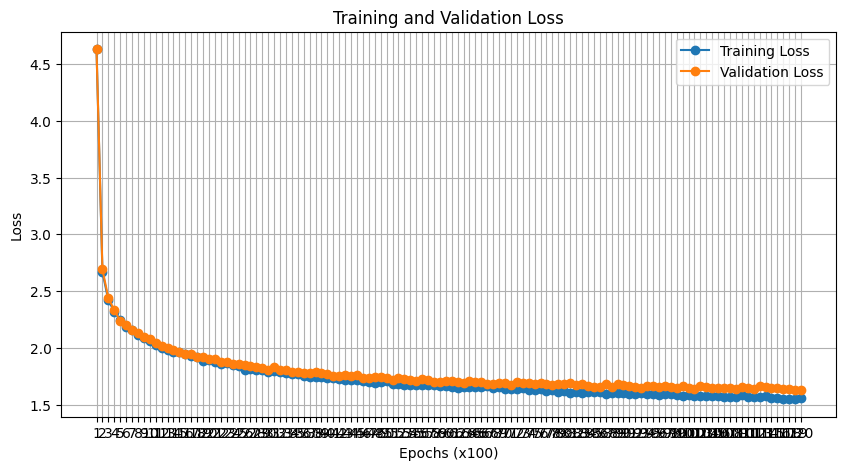

In [ ]:
import matplotlib.pyplot as plt
import torch
loss_data = final_model_losses_list
train_losses = [entry['train']['loss'] for entry in loss_data]
val_losses = [entry['val']['loss'] for entry in loss_data]
epochs = range(1, len(loss_data) + 1)
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs (x100)')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(model.state_dict())

OrderedDict([('token_embedding_table.weight', tensor([[-0.5744, -1.1238,  1.1371,  ..., -2.2263, -0.1051, -0.3281],
        [ 0.0888, -0.1910,  1.9640,  ..., -0.0259, -0.6253,  0.2530],
        [ 1.6474, -0.6321, -0.8443,  ...,  1.9031,  0.3248, -0.9417],
        ...,
        [-0.6944,  0.6212, -1.2072,  ...,  1.3827,  0.4400,  1.8804],
        [-1.2517,  0.6202,  0.8663,  ...,  1.4387,  0.3224, -0.9117],
        [-0.4100,  0.0198,  1.7664,  ..., -2.1198,  0.4621, -0.8103]])), ('position_embedding_table.weight', tensor([[ 1.8662,  0.1926,  0.7751,  ..., -0.4649,  2.1073,  1.0072],
        [ 0.5797,  0.5273, -0.0715,  ..., -1.4622,  0.9730, -0.9577],
        [ 1.7149, -0.1030,  1.2864,  ..., -0.5548,  1.5071, -0.6346],
        ...,
        [ 0.0307, -1.2528, -0.4054,  ..., -0.2737, -0.9947,  0.4419],
        [-0.2797,  0.7719,  0.9108,  ..., -0.7352, -0.2896,  0.2767],
        [ 0.3413,  1.9950, -1.3071,  ...,  0.4088,  0.2967,  0.8420]])), ('blocks.0.sa.heads.0.tril', tensor([[1., 0., 

###Testing for different context

In [ ]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=200)[0].tolist()))


    neve lave you was paest dirtlow are theire,
    Set me worase
    there at dare fur eit.
  DIMOTEN. I  am thankl; I he rememenne; nore madamen, and murth?
  GLOUCENE. Jought I am my hot; their blo


###Save Model

In [ ]:
torch.save(model.state_dict(), "pretrained_language_model.pth")
print("Model weights saved to 'pretrained_language_model.pth'.")

Model weights saved to 'pretrained_language_model.pth'.

    And by bad thy toward; but let arefuls!

    Did I him. Burth to ha storrow but that gave myself.
  GROT. She his prots out lown, by sennall?
    Burnized up lord of hills of me.
    If a hain worth jeing, but then his abey,
    And I were purf, warre was
    Where dispectice here changet reast, I'll
    their hair well follow me. Your begard!
  Beseam. I heartal you with
    it thee!  
    I that was. While, yet say na, which me speake.
  AGO. You reture is near from gaing there you!- Marth,
    Sattere, and I it charge
    Not the vertips.
  MOTHENS. Begiefore and at that the swivill.  
    The violisal, are drow give them; fut be our fortuse.
  ANDELL. If it a mockereford; flow, so off me, tirres;
    Eve moness and hang the defectly,
    Shill, all wharter and lave
    Unginere he heaven but nage, be dish'd their from,
    Turne to you is, here, hithere with th' cannot of my hope;
    To see lovan affavows, ciersuse I por